In [12]:
import sys
import time
sys.path.append('../core/python')
from commons import inc_inference, show_heatmap
from imagenet_classes import class_names
from vgg16 import VGG16

%matplotlib inline

In [13]:
image_file_path = "../images/input/imagenet/dog.jpg"

### Incremental CNN Inference with Projective Field Thresholding

In [29]:
#----------------------------------------API Method--------------------------------------#
# model: Class of the CNN model. Currently supports VGG16, ResNet18, and Inception3
# image_file_path: File path of the image on which OBE should be run
# patch_size: Size of the occlusion patch
# stride: Stride value to be used for striding the patch
# beta: Projective field thresholding value. 1.0 means no thresholding
# gpu: Whether to use GPUs or not
# c: value (between 0 and 1) to be used for the occlusion patch. 0 means a black color patch.

# more details on the technique can be found in https://adalabucsd.github.io/papers/2019_Krypton_SIGMOD.pdf

begin_time = time.time()
heatmap, prob, label = inc_inference('imagenet', VGG16, image_file_path, patch_size=16, stride=2,
                                     beta=1.0, gpu=True, c=0.0)
end_time = time.time()

In [30]:
print('Predicted Label: %s, Probability: %f, Time: %f s'%(class_names[label], prob, end_time-begin_time))

Predicted Label: Labrador retriever, Probability: 0.904082, Time: 10.154690 s


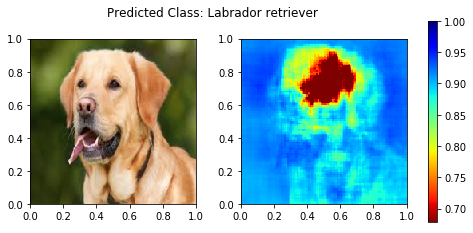

In [31]:
show_heatmap(image_file_path, heatmap, label=class_names[label], prob=prob, width=224)